# Dataset overview

In [95]:
import os
import seaborn as sns
import pandas as pd

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)
sns.set_style("whitegrid")

ROOT_DIR = "extracted_data_jsonl"

## Format

Dataset is provided in JSONLines format.

In [5]:
import pandas as pd
import jsonlines

chunk = []
with jsonlines.open(f"{ROOT_DIR}/test.jsonl", "r") as reader:
    for i, line in enumerate(reader):
        chunk.append(line)
        if i == 5:
            break
df = pd.DataFrame(chunk)
df.head()

,author,date,timezone,hash,message,mods,language,license,repo
0,914414,09.01.2017 16:27:32,10800,342e7bf9ff1ebff787238901245b45bd6118d391,Add tag comment on CONTRIBUTING.md\nFixes,"[{'change_type': 'MODIFY', 'old_path': 'CONTRI...",JavaScript,MIT License,openzeppelin/openzeppelin-contracts
1,914381,17.01.2017 12:29:54,-7200,67ad6abdaaa111cf3a7acd0be97fef8bcb6ace1e,"Fix typos\nOn unrelated note, why on earth che...","[{'change_type': 'MODIFY', 'old_path': 'docs/s...",JavaScript,MIT License,openzeppelin/openzeppelin-contracts
2,914412,23.01.2017 19:18:41,-3600,2f0471fff2b6ebdc6e2851756d0ab1aff87f7ea0,Make test cases that use assertJump fail if th...,"[{'change_type': 'MODIFY', 'old_path': 'test/B...",JavaScript,MIT License,openzeppelin/openzeppelin-contracts
3,914171,30.01.2017 23:30:43,7200,ae73f1a5646c4e671fa21978082ac964558fc991,Renamed files and replaced occurencies of 'Sto...,"[{'change_type': 'RENAME', 'old_path': 'contra...",JavaScript,MIT License,openzeppelin/openzeppelin-contracts
4,914145,07.02.2017 19:45:32,18000,70fbc7fe27941a1204fe0650f389fadff8feb215,BasicToken.sol: Remove useless check\nThe cond...,"[{'change_type': 'MODIFY', 'old_path': 'contra...",JavaScript,MIT License,openzeppelin/openzeppelin-contracts


## Keys

We include the following information about each commit:

| **Key** | **Description** |
|:-:|:-:|
| `repo` | Commit repository. |
| `hash` | Commit hash. |
| `author` | Unique id for commit author |
| `date` | Commit date (from author). |
| `timezone` | Commit timezone (from author). |
| `license` | Commit repository's license. |
| `language` | Commit repository's main language. |
| `message` | Commit message. |
| `mods` | Commit modifications. |



## Modifications

Commit changes are represented as list of file modifications. Each file modification includes the following information:

| **Key** | **Description** |
|:-:|:-:|
| `change_type` | Type of change to current file. One of: `ADD`, `COPY`, `RENAME`, `DELETE`, `MODIFY` or `UNKNOWN`. |
| `old_path` | Path to file before change. |
| `new_path` | Path to file after change. |
| `diff` | `git diff` for current file. |

You can also check `src/collection/commit_processor.py` and [PyDriller docs](https://pydriller.readthedocs.io/en/1.15/modifications.html) to get more information.

In [6]:
df.iloc[0]["mods"]

[{'change_type': 'MODIFY',
  'old_path': 'CONTRIBUTING.md',
  'new_path': 'CONTRIBUTING.md',
  'diff': "@@ -102,4 +102,6 @@ Main contributors will review your code and possibly ask for changes before your\nIf you have any questions feel free to post them to\n[github.com/OpenZeppelin/zeppelin-solidity/issues](https://github.com/OpenZeppelin/zeppelin-solidity/issues).\n+Finally, if you're looking to collaborate and want to find easy tasks to start, [look at the issues we marked as easy](https://github.com/OpenZeppelin/zeppelin-solidity/labels/easy).\n+\nThanks for your time and code!\n"}]

## Size

In [7]:
for part in ["train", "val", "test"]:
    print(f"{part} takes {os.path.getsize(f'{ROOT_DIR}/{part}.jsonl') >> 30} Gb")

train takes 29 Gb
val takes 5 Gb
test takes 5 Gb


# Metadata overview

In this notebook, we provide some statistics for the dataset. We focus on the following information:

| **Key** | **Description** |
|:-:|:-:|
| `repo` | Commit repository. |
| `hash` | Commit hash. |
| `author` | Unique id for commit author. |
| `num_mods` | Number of modified files in commit. |
| `num_lines_diff` | Total number of lines in commit mods. |
| `num_tokens_diff` | Total number of tokens (separated by whitespace) in commit mods. |
| `num_chars_diff` | Total number of characters in commit mods. |
| `num_lines_msg` | Number of lines in commit message. |
| `num_tokens_msg` | Number of tokens (separated by whitespace) in commit message. |
| `num_chars_msg` | Number of characters in commit message. |

In [8]:
chunk = []
with jsonlines.open("stats/final/test.jsonl", "r") as reader:
    for i, line in enumerate(reader):
        chunk.append(line)
        if i == 5:
            break
df = pd.DataFrame(chunk)
df.head()

,repo,hash,author,num_mods,file_extensions,num_lines_diff,num_tokens_diff,num_chars_diff,num_lines_msg,num_tokens_msg,num_chars_msg
0,openzeppelin/openzeppelin-contracts,342e7bf9ff1ebff787238901245b45bd6118d391,914414,1,{'.md': 1},7,53,480,2,5,40
1,openzeppelin/openzeppelin-contracts,67ad6abdaaa111cf3a7acd0be97fef8bcb6ace1e,914381,1,{'.rst': 1},11,70,597,2,17,98
2,openzeppelin/openzeppelin-contracts,2f0471fff2b6ebdc6e2851756d0ab1aff87f7ea0,914412,4,{'.js': 4},84,210,2228,1,11,58
3,openzeppelin/openzeppelin-contracts,ae73f1a5646c4e671fa21978082ac964558fc991,914171,6,"{'.sol': 2, '.rst': 2, '.js': 2}",147,451,4443,1,9,67
4,openzeppelin/openzeppelin-contracts,70fbc7fe27941a1204fe0650f389fadff8feb215,914145,1,{'.sol': 1},10,33,342,2,16,118


# General statistics

In [ ]:
with jsonlines.open("artifacts/filtered_ghs_results_25_jan_2023.jsonl", "r") as reader:
    repo_language_map = {line["name"]: line["mainLanguage"] for line in reader}

In [ ]:
from tqdm import tqdm


data = []
for part in ["train", "val", "test"]:
    with jsonlines.open(f"stats/final/{part}.jsonl", "r") as reader:
        for line in tqdm(reader, desc=f"Reading {part}..."):
            line["part"] = part
            line["language"] = repo_language_map[line["repo"]]
            data.append(line)

commit_metadata_df = pd.DataFrame(data)

Reading val...: 1554042it [00:16, 93605.28it/s] s]
Reading test...: 1486267it [00:10, 148614.15it/s]


### Number of examples in each dataset part by programming languages

In [96]:
pd.pivot_table(commit_metadata_df, index=["part"], columns=["language"], values=["hash"], aggfunc="count", margins=True)

hash                                                         \
language       C      C#      C++   Dart Elixir      Go Groovy     Java   
part                                                                      
test       38340   65528   123725   2895   5874  134699  38799   204862   
train     309153  425642   830683  42061  41562  672045  23262   952162   
val        57970   84708   201716  17527   3380  133954   1745   200035   
All       405463  575878  1156124  62483  50816  940698  63806  1357059   

                                                                         \
language JavaScript  Kotlin    Nix Objective-C     PHP   Python    Ruby   
part                                                                      
test         229720   28021   8108        7708   36618   247421   33433   
train       1076877  154276   2526       32517  178556  1330155  181916   
val          169502   29781  86022        1294   32293   212563   39912   
All         1476099  212078  96656       41519  247467  1790139  255261   

                                                                 
language    Rust   Shell Smalltalk   Swift TypeScript       All  
part                                                             
test       45167   27019      1120    8938     198272   1486267  
train     240037  117927     10130  101274     936697   7659458  
val        60788   13902      1465   28227     177258   1554042  
All       345992  158848     12715  138439    1312227  10699767

### Number of repositories in each dataset part by programming languages

In [97]:
pd.pivot_table(
    commit_metadata_df, index=["part"], columns=["language"], values=["repo"], aggfunc=pd.Series.nunique, margins=True
)

repo                                                                 \
language    C   C#  C++ Dart Elixir    Go Groovy  Java JavaScript Kotlin Nix   
part                                                                           
test       36   67   92    6      3   109      5   141        193     20   1   
train     317  507  682   48     38   862     33  1156       1474    151  12   
val        45   66   82    6      6   107      3   155        182     18   2   
All       398  640  856   60     47  1078     41  1452       1849    189  15   

                                                                             \
language Objective-C  PHP Python Ruby Rust Shell Smalltalk Swift TypeScript   
part                                                                          
test               6   65    192   59   38    23         1    14        145   
train             50  444   1581  421  327   173        10   134       1103   
val                8   56    207   49   44    22         2    18        132   
All               64  565   1980  529  409   218        13   166       1380   

                 
language    All  
part             
test       1216  
train      9523  
val        1210  
All       11949

### Number of commit authors in each dataset part by programming languages

In [98]:
pd.pivot_table(
    commit_metadata_df, index=["part"], columns=["language"], values=["author"], aggfunc=pd.Series.nunique, margins=True
)

author                                                             \
language      C     C#    C++  Dart Elixir     Go Groovy   Java JavaScript   
part                                                                         
test       1371   2920   5569   223     94   9232    740   7954      12689   
train     12392  18125  32572  1965   3423  54697    827  48748      69981   
val        2187   2541   6735  1181    176  10032     78   7800       8730   
All       15950  23586  44876  3369   3693  73961   1645  64502      91400   

                                                                      \
language Kotlin   Nix Objective-C    PHP Python   Ruby   Rust  Shell   
part                                                                   
test        738     6         257   3633  13798   2882   1721   2562   
train      5839   523        1404  16196  69986  15683  15987   8429   
val         810  2646         134   2359  11935   2816   3767   1976   
All        7387  3175        1795  22188  95719  21381  21475  12967   

                                             
language Smalltalk Swift TypeScript     All  
part                                         
test            31   400      10331   77151  
train          182  4268      57326  438553  
val             36  1246       8629   75814  
All            249  5914      76286  591518

# Statistics for diffs

## Number of lines in diffs

In [28]:
commit_metadata_df["num_lines_diff"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.069977e+07
mean     9.216423e+01
std      1.340527e+02
min      2.000000e+00
1%       7.000000e+00
5%       8.000000e+00
10%      9.000000e+00
25%      1.600000e+01
50%      3.900000e+01
75%      1.060000e+02
90%      2.420000e+02
95%      3.700000e+02
99%      6.720000e+02
max      3.726000e+03
Name: num_lines_diff, dtype: float64

In [26]:
commit_metadata_df.groupby("part")["num_lines_diff"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
part,,,,,,,,,,,,,,
test,1486267.0,91.156337,132.059768,2.0,7.0,8.0,9.0,16.0,40.0,105.0,239.0,365.0,664.0,3069.0
train,7659458.0,92.972750,134.773561,2.0,7.0,8.0,9.0,17.0,40.0,108.0,244.0,373.0,675.0,3726.0
val,1554042.0,89.143223,132.321113,2.0,7.0,8.0,9.0,16.0,37.0,101.0,235.0,364.0,669.0,2142.0


In [27]:
commit_metadata_df.groupby("language")["num_lines_diff"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
language,,,,,,,,,,,,,,
C,405463.0,90.428668,134.989607,2.0,7.0,8.0,9.0,16.0,37.0,102.0,239.0,373.0,677.00,2442.0
C#,575878.0,85.040790,118.949631,2.0,7.0,8.0,9.0,17.0,40.0,101.0,217.0,325.0,596.00,2389.0
C++,1156124.0,105.270176,145.639801,2.0,7.0,9.0,10.0,18.0,47.0,127.0,282.0,419.0,706.00,3510.0
Dart,62483.0,124.057568,164.421916,2.0,7.0,9.0,10.0,21.0,58.0,156.0,329.0,483.9,780.00,3694.0
Elixir,50816.0,83.059647,117.819254,2.0,7.0,8.0,9.0,16.0,37.0,98.0,213.0,322.0,595.00,1304.0
Go,940698.0,101.037561,143.098675,2.0,7.0,9.0,10.0,18.0,43.0,119.0,271.0,407.0,705.00,3726.0
Groovy,63806.0,87.301790,125.714978,2.0,7.0,8.0,9.0,15.0,38.0,102.0,232.0,348.0,627.95,2053.0
Java,1357059.0,111.147103,147.516435,2.0,7.0,9.0,10.0,19.0,51.0,138.0,299.0,433.0,705.00,2282.0
JavaScript,1476099.0,81.611513,126.546737,2.0,6.0,8.0,9.0,15.0,34.0,89.0,208.0,328.0,655.00,2271.0


## Number of characters in diffs

In [29]:
commit_metadata_df["num_chars_diff"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.069977e+07
mean     3.346831e+03
std      4.868229e+03
min      5.000000e+00
1%       1.910000e+02
5%       2.610000e+02
10%      3.320000e+02
25%      5.840000e+02
50%      1.422000e+03
75%      3.841000e+03
90%      8.853000e+03
95%      1.359700e+04
99%      2.445700e+04
max      4.267800e+04
Name: num_chars_diff, dtype: float64

In [17]:
commit_metadata_df.groupby("part")["num_chars_diff"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
part,,,,,,,,,,,,,,
test,1486267.0,3308.178436,4819.220020,12.0,189.0,258.0,330.0,583.0,1404.0,3801.0,8733.0,13409.0,24241.34,42574.0
train,7659458.0,3373.174082,4882.217506,5.0,191.0,262.0,334.0,590.0,1443.0,3883.0,8924.0,13669.0,24492.00,42678.0
val,1554042.0,3253.960315,4844.383238,7.0,193.0,260.0,328.0,556.0,1338.0,3666.0,8613.0,13412.0,24481.00,42602.0


In [19]:
commit_metadata_df.groupby("language")["num_chars_diff"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
language,,,,,,,,,,,,,,
C,405463.0,3120.933525,4632.434415,8.0,196.00,257.0,317.0,535.0,1278.0,3493.0,8318.0,12996.90,23186.00,42427.0
C#,575878.0,3284.337554,4599.645894,11.0,190.00,275.0,355.0,628.0,1513.0,3853.0,8405.0,12783.00,23342.23,42242.0
C++,1156124.0,3928.531073,5393.168332,12.0,208.00,290.0,369.0,672.0,1733.0,4752.0,10592.0,15727.00,26225.00,42379.0
Dart,62483.0,4269.047837,5644.362908,34.0,208.00,289.0,375.0,742.5,2011.0,5317.0,11414.8,16723.80,27233.18,42573.0
Elixir,50816.0,2956.751220,4187.848677,20.0,192.00,253.0,318.0,556.0,1330.0,3473.0,7628.0,11477.25,21011.55,42496.0
Go,940698.0,3620.864939,5145.318614,12.0,204.00,278.0,355.0,626.0,1560.0,4229.0,9710.0,14729.00,25127.00,42574.0
Groovy,63806.0,3495.710419,4970.939600,18.0,193.00,268.0,354.0,637.0,1526.0,4039.0,9272.5,14077.50,24776.75,40940.0
Java,1357059.0,4402.032198,5801.889374,13.0,206.00,304.0,399.0,767.0,2038.0,5497.0,11897.0,17242.00,27704.42,42562.0
JavaScript,1476099.0,2771.477921,4302.664489,13.0,178.00,233.0,296.0,505.0,1158.0,3015.0,7022.0,11179.00,22338.00,42569.0


## Number of tokens in diffs

In [30]:
commit_metadata_df["num_tokens_diff"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.069977e+07
mean     2.830168e+02
std      4.086771e+02
min      1.000000e+00
1%       1.200000e+01
5%       2.000000e+01
10%      2.700000e+01
25%      4.900000e+01
50%      1.220000e+02
75%      3.270000e+02
90%      7.470000e+02
95%      1.144000e+03
99%      2.072000e+03
max      3.706000e+03
Name: num_tokens_diff, dtype: float64

In [20]:
commit_metadata_df.groupby("part")["num_tokens_diff"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
part,,,,,,,,,,,,,,
test,1486267.0,279.177096,402.156505,1.0,12.0,20.0,27.0,50.0,122.0,323.0,731.0,1124.0,2036.0,3692.0
train,7659458.0,285.122499,410.260085,1.0,12.0,20.0,27.0,50.0,124.0,331.0,753.0,1150.0,2078.0,3706.0
val,1554042.0,276.310717,406.944085,1.0,12.0,20.0,27.0,48.0,116.0,314.0,730.0,1132.0,2073.0,3673.0


In [21]:
commit_metadata_df.groupby("language")["num_tokens_diff"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
language,,,,,,,,,,,,,,
C,405463.0,293.909397,435.231056,1.0,13.0,21.0,27.0,49.0,120.0,331.0,787.0,1233.0,2208.00,3570.0
C#,575878.0,258.942439,372.174174,1.0,10.0,18.0,25.0,47.0,117.0,301.0,664.0,1016.0,1906.00,3535.0
C++,1156124.0,336.562851,464.079739,1.0,13.0,22.0,29.0,57.0,149.0,407.0,908.0,1354.0,2279.00,3706.0
Dart,62483.0,356.904758,466.079061,1.0,14.0,23.0,31.0,64.0,170.0,448.0,952.0,1386.9,2240.00,3477.0
Elixir,50816.0,276.253739,386.320737,1.0,15.0,21.0,29.0,53.0,127.0,326.0,708.0,1071.0,1963.00,3497.0
Go,940698.0,328.300139,457.699370,1.0,14.0,24.0,31.0,57.0,144.0,389.0,878.0,1325.0,2276.00,3705.0
Groovy,63806.0,266.891499,380.467527,1.0,12.0,17.0,24.0,47.0,119.0,311.0,705.0,1065.0,1910.00,3533.0
Java,1357059.0,335.825319,452.463075,1.0,9.0,19.0,27.0,56.0,152.0,418.0,908.0,1326.0,2189.00,3628.0
JavaScript,1476099.0,239.807887,357.877556,1.0,11.0,18.0,24.0,44.0,104.0,269.0,616.0,961.0,1851.00,3690.0


## Number of modified files

In [31]:
commit_metadata_df["num_mods"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.069977e+07
mean     2.641177e+00
std      2.617668e+00
min      1.000000e+00
1%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
90%      6.000000e+00
95%      8.000000e+00
99%      1.300000e+01
max      1.600000e+01
Name: num_mods, dtype: float64

In [22]:
commit_metadata_df.groupby("part")["num_mods"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
part,,,,,,,,,,,,,,
test,1486267.0,2.660073,2.636254,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,8.0,13.0,16.0
train,7659458.0,2.651921,2.625257,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,8.0,13.0,16.0
val,1554042.0,2.570149,2.560613,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,8.0,13.0,16.0


In [25]:
commit_metadata_df.groupby("language")["num_mods"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
language,,,,,,,,,,,,,,
C,405463.0,2.398073,2.386741,1.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,8.0,13.0,16.0
C#,575878.0,2.675424,2.598074,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,8.0,13.0,16.0
C++,1156124.0,2.760759,2.690002,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,9.0,14.0,16.0
Dart,62483.0,3.171951,2.927899,1.0,1.0,1.0,1.0,1.0,2.0,4.0,7.0,10.0,14.0,16.0
Elixir,50816.0,2.617306,2.547306,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,8.0,13.0,16.0
Go,940698.0,2.727725,2.653411,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,9.0,13.0,16.0
Groovy,63806.0,2.716735,2.801643,1.0,1.0,1.0,1.0,1.0,1.0,3.0,6.0,9.0,14.0,16.0
Java,1357059.0,3.078922,3.007146,1.0,1.0,1.0,1.0,1.0,2.0,4.0,7.0,10.0,14.0,16.0
JavaScript,1476099.0,2.473411,2.447467,1.0,1.0,1.0,1.0,1.0,1.0,3.0,5.0,8.0,13.0,16.0


# Statistics for messages

## Number of lines in messages

In [39]:
commit_metadata_df["num_lines_msg"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.069977e+07
mean     1.359476e+00
std      9.994877e-01
min      1.000000e+00
1%       1.000000e+00
5%       1.000000e+00
10%      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
90%      2.000000e+00
95%      4.000000e+00
99%      6.000000e+00
max      3.600000e+01
Name: num_lines_msg, dtype: float64

In [37]:
commit_metadata_df.groupby("part")["num_lines_msg"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
part,,,,,,,,,,,,,,
test,1486267.0,1.396916,1.035144,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,6.0,32.0
train,7659458.0,1.347016,0.990283,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,36.0
val,1554042.0,1.385081,1.008515,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,6.0,28.0


In [38]:
commit_metadata_df.groupby("language")["num_lines_msg"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
language,,,,,,,,,,,,,,
C,405463.0,1.614063,1.238191,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,25.0
C#,575878.0,1.212113,0.729822,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,24.0
C++,1156124.0,1.472672,1.171186,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,6.0,31.0
Dart,62483.0,1.434102,1.048437,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,6.0,17.0
Elixir,50816.0,1.287626,0.843588,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,18.0
Go,940698.0,1.515206,1.176670,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,6.0,27.0
Groovy,63806.0,1.409977,0.976315,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,5.0,16.0
Java,1357059.0,1.390316,1.022991,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0,24.0
JavaScript,1476099.0,1.251283,0.834135,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,25.0


## Number of characters in messages

In [34]:
commit_metadata_df["num_chars_msg"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.069977e+07
mean     6.030748e+01
std      5.379618e+01
min      4.000000e+00
1%       1.400000e+01
5%       1.900000e+01
10%      2.200000e+01
25%      3.000000e+01
50%      4.400000e+01
75%      6.400000e+01
90%      1.200000e+02
95%      1.830000e+02
99%      2.870000e+02
max      4.900000e+02
Name: num_chars_msg, dtype: float64

In [32]:
commit_metadata_df.groupby("part")["num_chars_msg"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
part,,,,,,,,,,,,,,
test,1486267.0,62.279736,56.557051,5.0,13.0,18.0,22.0,30.0,44.0,67.0,130.0,195.0,293.0,487.0
train,7659458.0,59.523834,52.776568,4.0,14.0,19.0,22.0,30.0,43.0,64.0,116.0,179.0,285.0,490.0
val,1554042.0,62.283590,55.924684,4.0,14.0,18.0,22.0,31.0,44.0,66.0,130.0,192.0,290.0,487.0


In [33]:
commit_metadata_df.groupby("language")["num_chars_msg"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
language,,,,,,,,,,,,,,
C,405463.0,74.735236,63.990096,5.0,15.0,21.0,25.0,35.0,50.0,85.0,170.8,224.0,302.00,485.0
C#,575878.0,56.329523,47.152070,5.0,14.0,18.0,22.0,30.0,43.0,63.0,103.0,152.0,268.00,483.0
C++,1156124.0,68.396419,60.845106,6.0,14.0,19.0,23.0,33.0,47.0,74.0,152.0,213.0,301.00,487.0
Dart,62483.0,64.394027,55.267806,6.0,14.0,19.0,23.0,33.0,47.0,69.0,131.0,193.0,288.00,468.0
Elixir,50816.0,54.810355,46.784104,7.0,14.0,19.0,22.0,30.0,42.0,58.0,97.0,156.0,268.85,446.0
Go,940698.0,66.498699,60.494078,4.0,14.0,19.0,23.0,32.0,45.0,69.0,153.0,213.0,295.00,487.0
Groovy,63806.0,70.187506,57.516796,5.0,16.0,22.0,26.0,36.0,52.0,77.0,143.0,201.0,298.00,472.0
Java,1357059.0,66.360009,56.695186,5.0,14.0,20.0,24.0,34.0,49.0,73.0,131.0,195.0,301.00,488.0
JavaScript,1476099.0,52.752634,46.048809,5.0,13.0,18.0,21.0,28.0,40.0,57.0,90.0,146.0,267.00,490.0


## Number of tokens in messages

In [35]:
commit_metadata_df.groupby("part")["num_tokens_msg"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
part,,,,,,,,,,,,,,
test,1486267.0,8.709465,7.715941,1.0,2.0,3.0,3.0,4.0,6.0,9.0,18.0,27.0,41.0,161.0
train,7659458.0,8.391317,7.215911,1.0,2.0,3.0,3.0,4.0,6.0,9.0,16.0,25.0,40.0,207.0
val,1554042.0,8.726922,7.707192,1.0,2.0,3.0,3.0,4.0,6.0,9.0,18.0,27.0,41.0,144.0


In [36]:
commit_metadata_df.groupby("language")["num_tokens_msg"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
language,,,,,,,,,,,,,,
C,405463.0,10.400981,8.808601,1.0,2.0,3.0,4.0,5.0,7.0,12.0,23.0,31.0,42.0,166.0
C#,575878.0,7.977365,6.666008,1.0,2.0,2.0,3.0,4.0,6.0,9.0,15.0,21.0,38.0,139.0
C++,1156124.0,9.477068,8.168927,1.0,2.0,3.0,3.0,5.0,7.0,10.0,20.0,29.0,41.0,144.0
Dart,62483.0,8.704848,7.470528,1.0,2.0,3.0,3.0,4.0,6.0,9.0,17.0,26.0,39.0,52.0
Elixir,50816.0,7.935020,6.602614,1.0,2.0,3.0,3.0,4.0,6.0,9.0,14.0,22.0,38.0,81.0
Go,940698.0,9.458480,8.431417,1.0,2.0,3.0,3.0,5.0,7.0,10.0,21.0,30.0,42.0,180.0
Groovy,63806.0,9.591136,8.045891,1.0,2.0,3.0,3.0,5.0,7.0,11.0,20.0,28.0,42.0,72.0
Java,1357059.0,9.099162,7.572830,1.0,2.0,3.0,3.0,5.0,7.0,10.0,18.0,26.0,41.0,142.0
JavaScript,1476099.0,7.468467,6.278203,1.0,2.0,3.0,3.0,4.0,6.0,8.0,13.0,20.0,37.0,132.0


# Statistics for repositories

In [40]:
def calculate_repo_stats(df):
    lang_stats = df.groupby("language")["hash"].count().to_dict()
    repo_stats = df.groupby("repo").agg(num_commits=("hash", "count"), lang=("language", "first"))
    repo_stats["percent_commits"] = (repo_stats["num_commits"] / len(df)) * 100
    repo_stats["percent_commits_by_lang"] = (
        repo_stats["num_commits"] / [lang_stats[lang] for lang in repo_stats.lang]
    ) * 100
    return repo_stats

## Number of commits per repository


In [41]:
dfs = []

for part in ["train", "val", "test"]:
    part_stats = calculate_repo_stats(commit_metadata_df.loc[commit_metadata_df.part == part])
    part_percentiles = (
        part_stats.num_commits.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
        .to_frame()
        .transpose()
    )
    part_percentiles["part"] = part
    dfs.append(part_percentiles)

df = pd.concat(dfs, axis=0, ignore_index=True)
df.reindex(columns=[df.columns.tolist()[-1]] + df.columns.tolist()[:-1])

,part,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
0,train,9523.0,804.311456,1539.953926,1.0,2.0,11.00,29.0,114.00,392.0,900.0,1863.0,2884.9,6407.68,41929.0
1,val,1210.0,1284.332231,3409.837431,1.0,4.0,37.45,102.0,307.25,677.0,1320.0,2642.1,4105.2,9309.26,85160.0
2,test,1216.0,1222.259046,2358.038055,1.0,3.0,40.75,116.5,300.00,657.5,1246.5,2505.0,4161.0,9216.60,40928.0


## Ratio of commits per repository


$\frac{\text{# commits in repo}}{\text{total # commits}}$

In [42]:
dfs = []

for part in ["train", "val", "test"]:
    part_stats = calculate_repo_stats(commit_metadata_df.loc[commit_metadata_df.part == part])
    part_percentiles = (
        part_stats.percent_commits.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
        .to_frame()
        .transpose()
    )
    part_percentiles["part"] = part
    dfs.append(part_percentiles)

df = pd.concat(dfs, axis=0, ignore_index=True)
df.reindex(columns=[df.columns.tolist()[-1]] + df.columns.tolist()[:-1])

,part,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
0,train,9523.0,0.010501,0.020105,0.000013,0.000026,0.000144,0.000379,0.001488,0.005118,0.011750,0.024323,0.037665,0.083657,0.547415
1,val,1210.0,0.082645,0.219417,0.000064,0.000257,0.002410,0.006564,0.019771,0.043564,0.084940,0.170015,0.264163,0.599035,5.479903
2,test,1216.0,0.082237,0.158655,0.000067,0.000202,0.002742,0.007838,0.020185,0.044238,0.083868,0.168543,0.279963,0.620117,2.753745


## Ratio of commits per repository per language

$\frac{\text{# commits in repo}}{\text{total # commits per repo's language}}$

In [43]:
dfs = []

for part in ["train", "val", "test"]:
    part_stats = calculate_repo_stats(commit_metadata_df.loc[commit_metadata_df.part == part])
    part_percentiles = (
        part_stats.percent_commits_by_lang.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
        .to_frame()
        .transpose()
    )
    part_percentiles["part"] = part
    dfs.append(part_percentiles)

df = pd.concat(dfs, axis=0, ignore_index=True)
df.reindex(columns=[df.columns.tolist()[-1]] + df.columns.tolist()[:-1])

,part,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
0,train,9523.0,0.210018,0.906879,0.000075,0.000226,0.001579,0.004183,0.016715,0.054054,0.146058,0.392846,0.686615,2.406909,34.193196
1,val,1210.0,1.652893,5.438653,0.000496,0.002837,0.027968,0.070007,0.225586,0.513104,1.217465,3.040807,5.543473,23.402530,98.997931
2,test,1216.0,1.644737,5.877545,0.000404,0.002216,0.030128,0.070188,0.208545,0.512168,1.242486,3.016997,4.787705,20.532242,100.000000


## More in-depth per-language analysis of commits per repository

### Train

In [44]:
train_stats = calculate_repo_stats(commit_metadata_df.loc[commit_metadata_df.part == "train"])

In [58]:
train_stats.groupby("lang")["num_commits"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
lang,,,,,,,,,,,,,,
C,317.0,975.246057,1513.007018,1.0,2.16,11.80,26.2,136.00,534.0,1178.00,2172.0,3069.00,8111.60,13323.0
C#,507.0,839.530572,1793.525613,1.0,2.00,12.00,37.2,138.00,442.0,907.00,1771.8,2783.30,6461.96,30480.0
C++,682.0,1218.010264,2382.415875,1.0,1.00,13.00,41.1,243.00,593.5,1270.00,2683.9,4253.25,10581.11,31946.0
Dart,48.0,876.270833,2092.235695,5.0,6.41,28.75,59.2,156.50,388.0,780.00,1395.0,2519.30,8982.64,14382.0
Elixir,38.0,1093.736842,1274.356153,12.0,34.20,163.80,205.9,445.50,673.5,1372.25,1835.3,3541.95,5762.64,6032.0
Go,862.0,779.634571,1330.851269,1.0,2.61,18.05,39.0,144.00,400.5,841.75,1762.8,2771.65,8073.69,12710.0
Groovy,33.0,704.909091,1171.857323,3.0,4.92,10.20,17.4,44.00,229.0,740.00,2101.4,2920.20,4687.20,5220.0
Java,1156.0,823.669550,1732.616882,1.0,1.00,8.75,24.5,101.00,366.5,914.25,1982.0,3036.50,6498.10,37811.0
JavaScript,1474.0,730.581411,1422.706877,1.0,1.00,8.65,21.0,80.00,320.0,784.25,1751.6,2691.80,5934.99,20851.0


In [57]:
train_stats.groupby("lang")["percent_commits_by_lang"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
lang,,,,,,,,,,,,,,
C,317.0,0.315457,0.489404,0.000323,0.000699,0.003817,0.008475,0.043991,0.172730,0.381041,0.702565,0.992712,2.623814,4.309517
C#,507.0,0.197239,0.421370,0.000235,0.000470,0.002819,0.008740,0.032422,0.103843,0.213090,0.416265,0.653906,1.518168,7.160947
C++,682.0,0.146628,0.286802,0.000120,0.000120,0.001565,0.004948,0.029253,0.071447,0.152886,0.323096,0.512018,1.273784,3.845751
Dart,48.0,2.083333,4.974289,0.011887,0.015240,0.068353,0.140748,0.372079,0.922470,1.854449,3.316612,5.989634,21.356221,34.193196
Elixir,38.0,2.631579,3.066157,0.028873,0.082287,0.394110,0.495404,1.071893,1.620471,3.301694,4.415813,8.522087,13.865165,14.513257
Go,862.0,0.116009,0.198030,0.000149,0.000388,0.002686,0.005803,0.021427,0.059594,0.125252,0.262304,0.412420,1.201362,1.891242
Groovy,33.0,3.030303,5.037646,0.012897,0.021150,0.043848,0.074800,0.189150,0.984438,3.181154,9.033617,12.553521,20.149600,22.440031
Java,1156.0,0.086505,0.181967,0.000105,0.000105,0.000919,0.002573,0.010607,0.038491,0.096018,0.208158,0.318906,0.682457,3.971068
JavaScript,1474.0,0.067843,0.132114,0.000093,0.000093,0.000803,0.001950,0.007429,0.029716,0.072826,0.162656,0.249964,0.551130,1.936247


### Validation

In [47]:
val_stats = calculate_repo_stats(commit_metadata_df.loc[commit_metadata_df.part == "val"])

In [56]:
val_stats.groupby("lang")["num_commits"].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).head(
    20
)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
lang,,,,,,,,,,,,,,
C,45.0,1288.222222,1916.878344,10.0,17.04,33.00,127.6,276.00,633.0,1428.00,2788.2,4018.20,8368.64,11677.0
C#,66.0,1283.454545,2228.953395,4.0,4.00,20.00,73.5,337.75,570.0,1121.25,2836.5,5134.75,11032.90,14136.0
C++,82.0,2459.951220,7014.482380,1.0,1.00,16.30,71.0,505.00,954.5,1876.25,4229.5,5665.80,29907.47,59483.0
Dart,6.0,2921.166667,4609.626944,137.0,154.10,222.50,308.0,596.75,1197.5,2098.25,7258.0,9729.00,11705.80,12200.0
Elixir,6.0,563.333333,320.762009,52.0,66.45,124.25,196.5,406.75,621.5,774.00,872.0,898.50,919.70,925.0
Go,107.0,1251.906542,1393.257954,4.0,15.70,183.60,237.8,498.00,818.0,1394.00,2455.0,4063.10,7770.94,8677.0
Groovy,3.0,581.666667,372.216783,217.0,224.00,252.00,287.0,392.00,567.0,764.00,882.2,921.60,953.12,961.0
Java,155.0,1290.548387,1810.883953,1.0,6.62,62.10,111.0,295.50,738.0,1492.50,3269.6,4236.40,7487.12,15451.0
JavaScript,182.0,931.329670,1276.003590,1.0,2.00,17.30,40.8,220.75,560.0,999.25,2447.3,2934.95,6325.51,8776.0


In [55]:
val_stats.groupby("lang")["percent_commits_by_lang"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
lang,,,,,,,,,,,,,,
C,45.0,2.222222,3.306673,0.017250,0.029395,0.056926,0.220114,0.476108,1.091944,2.463343,4.809729,6.931516,14.436157,20.143178
C#,66.0,1.515152,2.631338,0.004722,0.004722,0.023611,0.086769,0.398723,0.672900,1.323665,3.348562,6.061706,13.024626,16.687916
C++,82.0,1.219512,3.477405,0.000496,0.000496,0.008081,0.035198,0.250352,0.473190,0.930144,2.096760,2.808800,14.826523,29.488489
Dart,6.0,16.666667,26.300148,0.781651,0.879215,1.269470,1.757289,3.404747,6.832316,11.971530,41.410395,55.508644,66.787243,69.606892
Elixir,6.0,16.666667,9.490000,1.538462,1.965976,3.676036,5.813609,12.034024,18.387574,22.899408,25.798817,26.582840,27.210059,27.366864
Go,107.0,0.934579,1.040102,0.002986,0.011720,0.137062,0.177524,0.371769,0.610657,1.040656,1.832719,3.033205,5.801200,6.477597
Groovy,3.0,33.333333,21.330475,12.435530,12.836676,14.441261,16.446991,22.464183,32.492837,43.782235,50.555874,52.813754,54.620057,55.071633
Java,155.0,0.645161,0.905284,0.000500,0.003309,0.031045,0.055490,0.147724,0.368935,0.746119,1.634514,2.117829,3.742905,7.724148
JavaScript,182.0,0.549451,0.752796,0.000590,0.001180,0.010206,0.024071,0.130234,0.330380,0.589521,1.443818,1.731513,3.731820,5.177520


### Test

In [50]:
test_stats = calculate_repo_stats(commit_metadata_df.loc[commit_metadata_df.part == "test"]).reset_index()

In [54]:
test_stats.groupby("lang")["num_commits"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
lang,,,,,,,,,,,,,,
C,36.0,1065.000000,951.255411,22.0,28.65,119.00,238.0,494.50,764.5,1275.25,2236.0,2973.25,4049.05,4321.0
C#,67.0,978.029851,982.385747,1.0,2.32,32.70,85.2,298.00,739.0,1259.50,2135.8,2973.80,4195.78,4273.0
C++,92.0,1344.836957,1777.307584,1.0,17.38,38.55,146.9,413.50,776.0,1515.00,3584.1,4068.55,6899.09,12997.0
Dart,6.0,482.500000,214.905328,219.0,220.20,225.00,231.0,290.75,543.0,663.25,673.5,676.75,679.35,680.0
Elixir,3.0,1958.000000,1371.855678,412.0,452.40,614.00,816.0,1422.00,2432.0,2731.00,2910.4,2970.20,3018.04,3030.0
Go,109.0,1235.770642,1094.028468,12.0,36.16,227.60,309.8,574.00,884.0,1497.00,2525.6,3353.80,5805.00,6487.0
Groovy,5.0,7759.800000,15355.062120,289.0,292.88,308.40,327.8,386.00,509.0,2433.00,22082.4,28632.20,33872.04,35182.0
Java,141.0,1452.921986,3268.232152,1.0,1.00,10.00,27.0,190.00,616.0,1336.00,3370.0,5698.00,14072.40,30874.0
JavaScript,193.0,1190.259067,1921.044813,1.0,4.68,13.00,70.2,225.00,550.0,1161.00,2496.6,5255.00,9894.04,11235.0


In [53]:
test_stats.groupby("lang")["percent_commits_by_lang"].describe(
    percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
).head(20)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
lang,,,,,,,,,,,,,,
C,36.0,2.777778,2.481104,0.057381,0.074726,0.310381,0.620762,1.289776,1.994001,3.326161,5.832029,7.754956,10.560902,11.270214
C#,67.0,1.492537,1.499185,0.001526,0.003540,0.049902,0.130021,0.454767,1.127762,1.922079,3.259370,4.538213,6.403034,6.520877
C++,92.0,1.086957,1.436498,0.000808,0.014047,0.031158,0.118731,0.334209,0.627197,1.224490,2.896828,3.288381,5.576149,10.504748
Dart,6.0,16.666667,7.423327,7.564767,7.606218,7.772021,7.979275,10.043178,18.756477,22.910190,23.264249,23.376511,23.466321,23.488774
Elixir,3.0,33.333333,23.354710,7.013960,7.701736,10.452843,13.891726,24.208376,41.402792,46.493020,49.547157,50.565203,51.379639,51.583248
Go,109.0,0.917431,0.812202,0.008909,0.026845,0.168969,0.229994,0.426135,0.656278,1.111367,1.874995,2.489848,4.309609,4.815923
Groovy,5.0,20.000000,39.575922,0.744865,0.754865,0.794866,0.844867,0.994871,1.311889,6.270780,56.914869,73.796232,87.301322,90.677595
Java,141.0,0.709220,1.595334,0.000488,0.000488,0.004881,0.013180,0.092745,0.300690,0.652146,1.645010,2.781385,6.869210,15.070633
JavaScript,193.0,0.518135,0.836255,0.000435,0.002037,0.005659,0.030559,0.097945,0.239422,0.505398,1.086801,2.287567,4.307000,4.890737


# Statistics for authors

In [93]:
def calculate_author_stats(df, skip_single_commit: bool = False):
    lang_stats = df.groupby("language")["hash"].count().to_dict()
    author_stats = df.groupby("author").agg(num_commits=("hash", "count"), lang=("language", "first"))
    if skip_single_commit:
        author_stats = author_stats.loc[author_stats.num_commits > 1].copy()
    author_stats["percent_commits"] = (author_stats["num_commits"] / len(df)) * 100
    author_stats["percent_commits_by_lang"] = (
        author_stats["num_commits"] / [lang_stats[lang] for lang in author_stats.lang]
    ) * 100
    return author_stats

## Number of commits per author

In [90]:
dfs = []

for part in ["train", "val", "test"]:
    part_stats = calculate_author_stats(commit_metadata_df.loc[commit_metadata_df.part == part])
    part_percentiles = (
        part_stats.num_commits.describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
        .to_frame()
        .transpose()
    )
    part_percentiles["part"] = part
    dfs.append(part_percentiles)

df = pd.concat(dfs, axis=0, ignore_index=True)
df.reindex(columns=[df.columns.tolist()[-1]] + df.columns.tolist()[:-1])

,part,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
0,train,438553.0,17.465296,114.148959,1.0,1.0,1.0,1.0,1.0,1.0,4.0,17.0,54.0,351.00,12625.0
1,val,75814.0,20.498087,138.585586,1.0,1.0,1.0,1.0,1.0,1.0,4.0,22.0,67.0,410.87,12050.0
2,test,77151.0,19.264391,128.996838,1.0,1.0,1.0,1.0,1.0,1.0,4.0,19.0,59.5,392.50,9932.0


## Percentage of original history retained

> Work in progress!

# Statistics for file extensions

## Overall

In [64]:
from collections import Counter

c = Counter()

for d in tqdm(commit_metadata_df.file_extensions):
    c.update(d)

c.most_common(50)

100%|██████████| 10699767/10699767 [00:12<00:00, 854521.81it/s]


[('.py', 2950320),
 ('.java', 2890424),
 ('.js', 2596415),
 ('.go', 1685432),
 ('.ts', 1676992),
 ('.md', 1247123),
 ('.cpp', 1076257),
 ('.json', 1075146),
 ('.cs', 1050742),
 ('.h', 792069),
 ('.rs', 708335),
 ('.tsx', 561272),
 ('.yml', 530678),
 ('.php', 455861),
 ('.kt', 448806),
 ('.xml', 441764),
 ('.rb', 420084),
 ('.yaml', 395676),
 ('.c', 379502),
 ('.html', 333467),
 ('.cc', 329406),
 ('.sh', 324131),
 ('.txt', 311558),
 ('.swift', 282947),
 ('.scss', 204439),
 ('.rst', 194887),
 ('.hpp', 192972),
 ('.png', 181276),
 ('.jsx', 171475),
 ('.dart', 147913),
 ('.lock', 129818),
 ('.nix', 127011),
 ('.css', 118205),
 ('.vue', 117767),
 ('.gradle', 116207),
 ('.groovy', 106538),
 ('.csproj', 100585),
 ('.toml', 96271),
 ('Makefile', 72106),
 ('.ex', 68240),
 ('Dockerfile', 66864),
 ('.m', 63959),
 ('.properties', 63234),
 ('.snap', 54049),
 ('.erb', 51474),
 ('.gitignore', 47936),
 ('.less', 46802),
 ('BUILD', 46298),
 ('.adoc', 43135),
 ('.svg', 41436)]

## Per programming language

In [67]:
from collections import defaultdict


lang_stats = defaultdict(Counter)

for lang in tqdm(commit_metadata_df.language.unique(), desc="Iterating over languages"):
    lang_df = commit_metadata_df.loc[commit_metadata_df.language == lang]
    for d in lang_df.file_extensions:
        lang_stats[lang].update(d)

Iterating over languages: 100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


In [72]:
for lang in lang_stats:
    print(lang)
    print(lang_stats[lang].most_common(20))
    print()

TypeScript
[('.ts', 1422074), ('.js', 490670), ('.tsx', 445687), ('.json', 403830), ('.md', 207949), ('.html', 72757), ('.scss', 72117), ('.yml', 54935), ('.lock', 39101), ('.vue', 33407), ('.css', 33190), ('.jsx', 30477), ('.png', 27586), ('.snap', 26158), ('.py', 21237), ('.mdx', 18897), ('.yaml', 17733), ('.sh', 17395), ('.go', 15128), ('.java', 14663)]

PHP
[('.php', 419039), ('.md', 33871), ('.json', 26065), ('.js', 25240), ('.yml', 16473), ('.twig', 12381), ('.inc', 9279), ('.scss', 6968), ('.xml', 6923), ('.yaml', 6738), ('.vue', 6685), ('.rst', 4981), ('.lock', 4936), ('.sh', 4144), ('.css', 4024), ('.phpt', 3693), ('.png', 2862), ('.html', 2824), ('.zep', 2505), ('.txt', 2258)]

JavaScript
[('.js', 1792646), ('.json', 330847), ('.md', 243747), ('.ts', 117529), ('.jsx', 108221), ('.html', 104274), ('.scss', 83941), ('.yml', 54899), ('.css', 47681), ('.py', 46972), ('.tsx', 44627), ('.png', 41973), ('.rb', 34452), ('.vue', 34017), ('.php', 29627), ('.xml', 25080), ('.lock', 2493

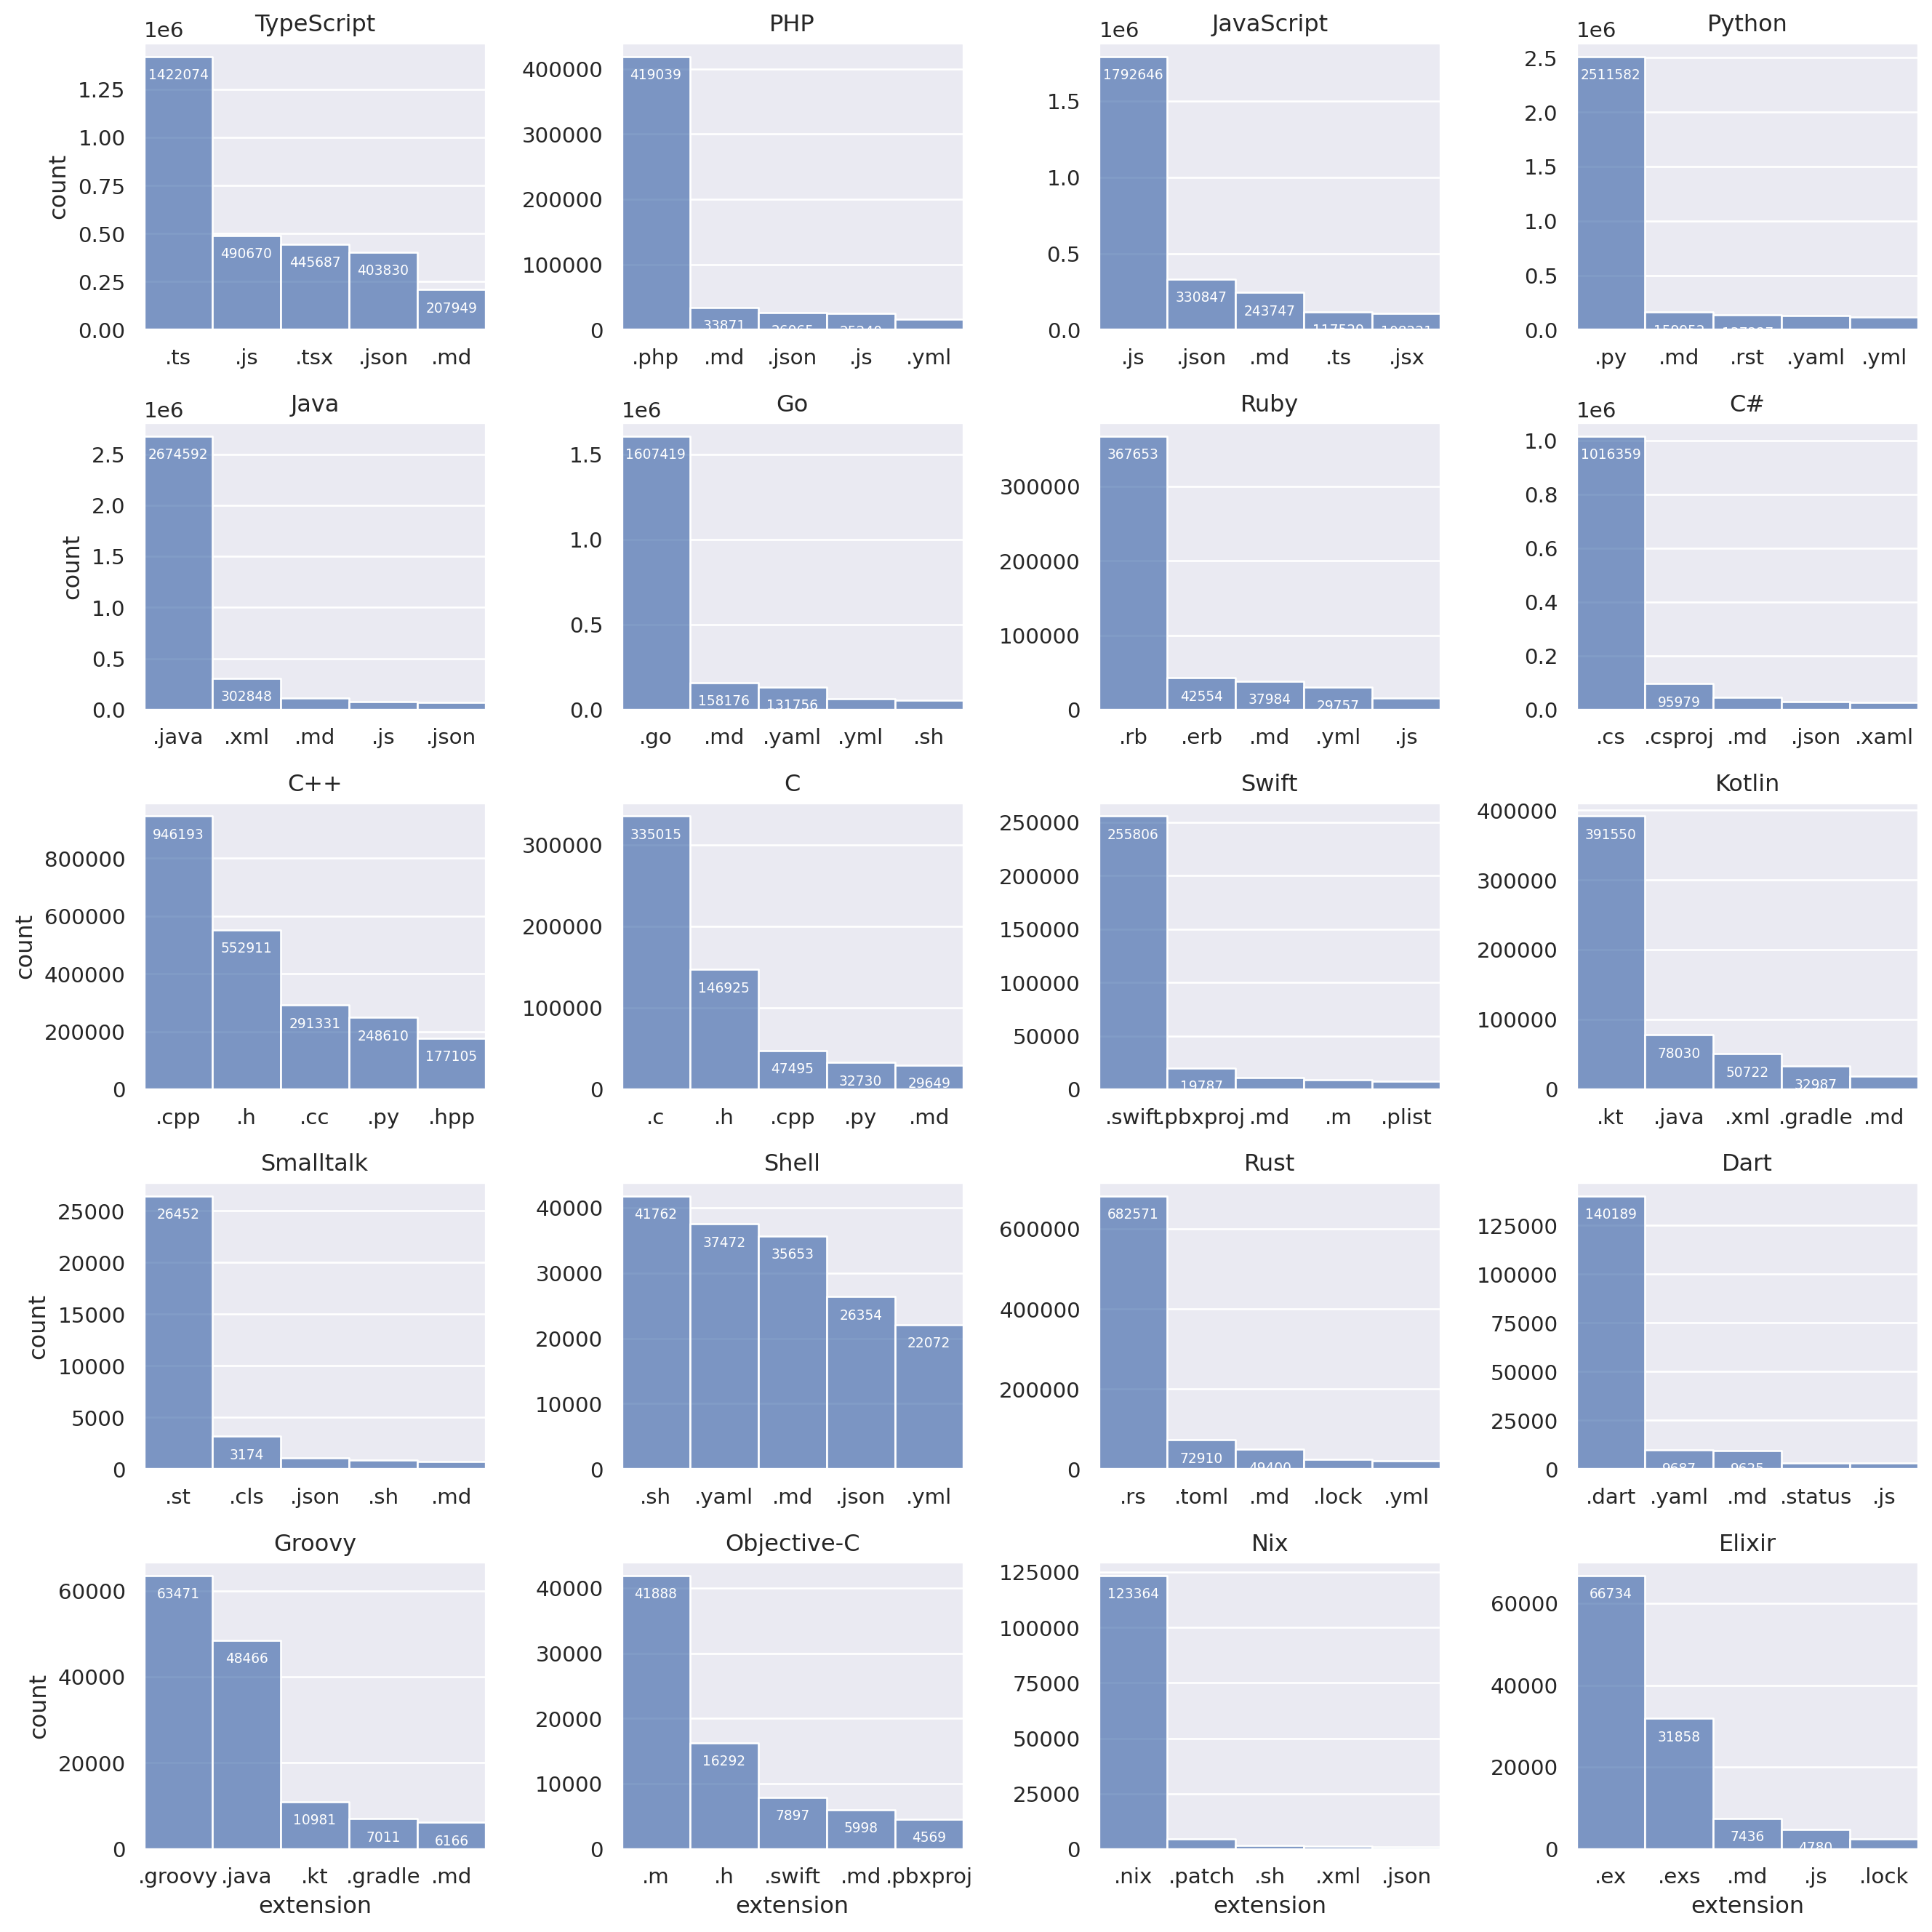

In [88]:
import seaborn.objects as so

data = []

for lang in lang_stats:
    data.extend(
        [{"extension": pair[0], "count": pair[1], "language": lang} for pair in lang_stats[lang].most_common(5)]
    )
_ = pd.DataFrame(data)

(
    so.Plot(_, x="extension", y="count", text="count")
    .facet("language", wrap=4)
    .share(x=False, y=False)
    .add(so.Bars())
    .add(so.Text(color="w", valign="top", offset=6, fontsize=7))
    .layout(size=(14, 14), engine="tight")
)